# Time series analysis inspired by the [original file](./time-series-analysis-ARIMA.ipynb)

To solidify my knowledge of ARIMA model I am doing this analysis. I will inspired by the original project but trying to do as much as I can by my own.

In [38]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_12233/3430488684.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('./international-airline-passengers.csv', skipfooter=3)


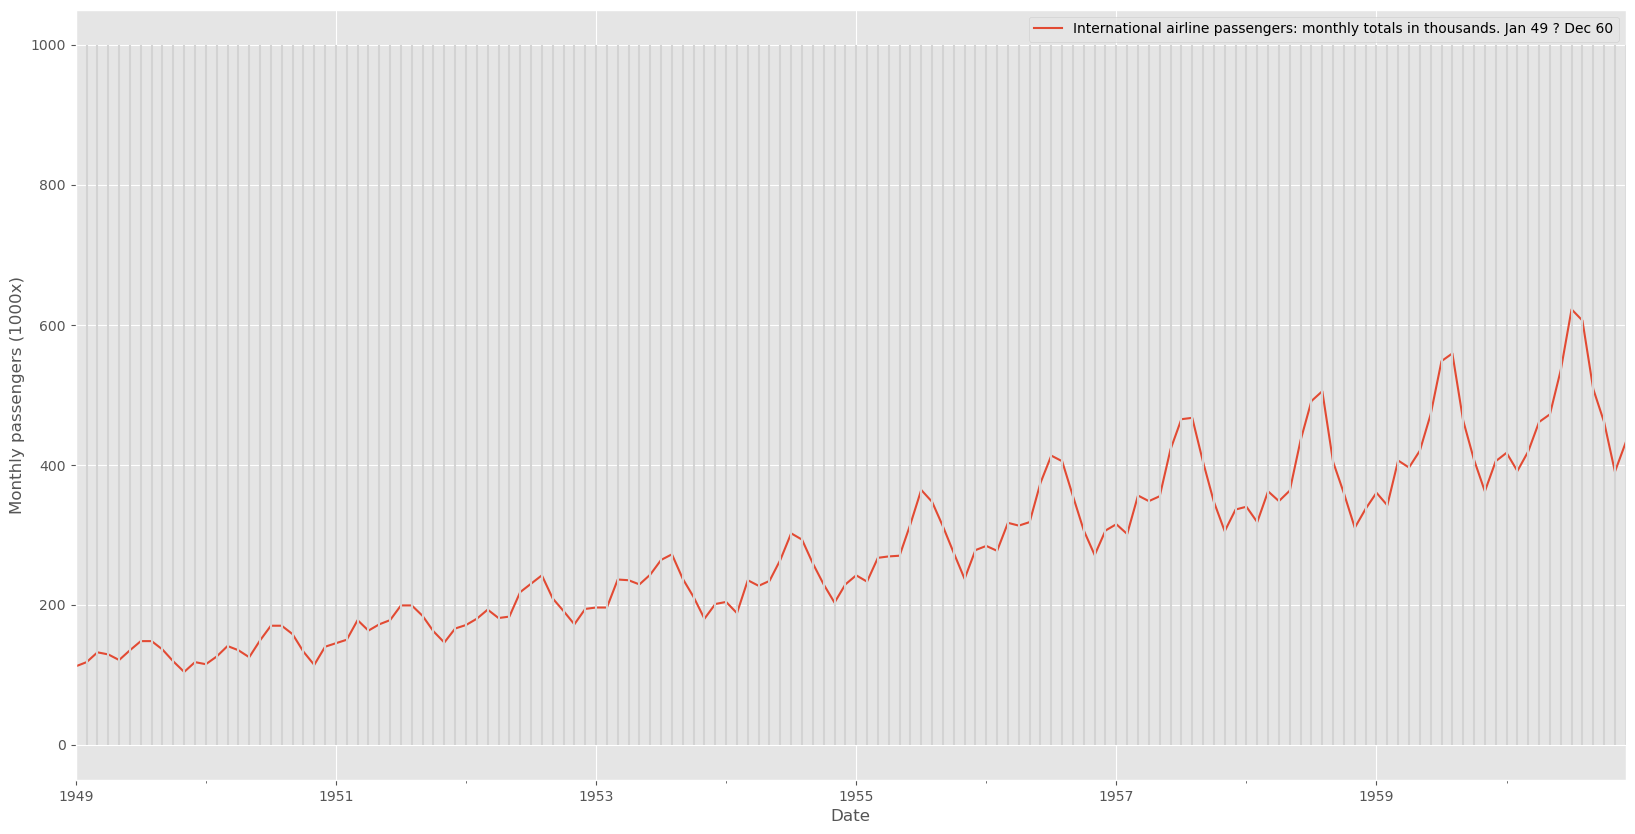

In [39]:
# read csv into panda
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('ggplot')



data = pd.read_csv('./international-airline-passengers.csv', skipfooter=3)


data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

data.plot()
plt.xlabel('Date')
plt.ylabel('Monthly passengers (1000x)')

plt.vlines(x=data.index, ymin=0, ymax=1000, color='lightgray', linestyle='---', )



This plot clearly shows an growing tendency of the monthly airlines passengers. There also seems to be a seasonality peaking at summer month (August, July)

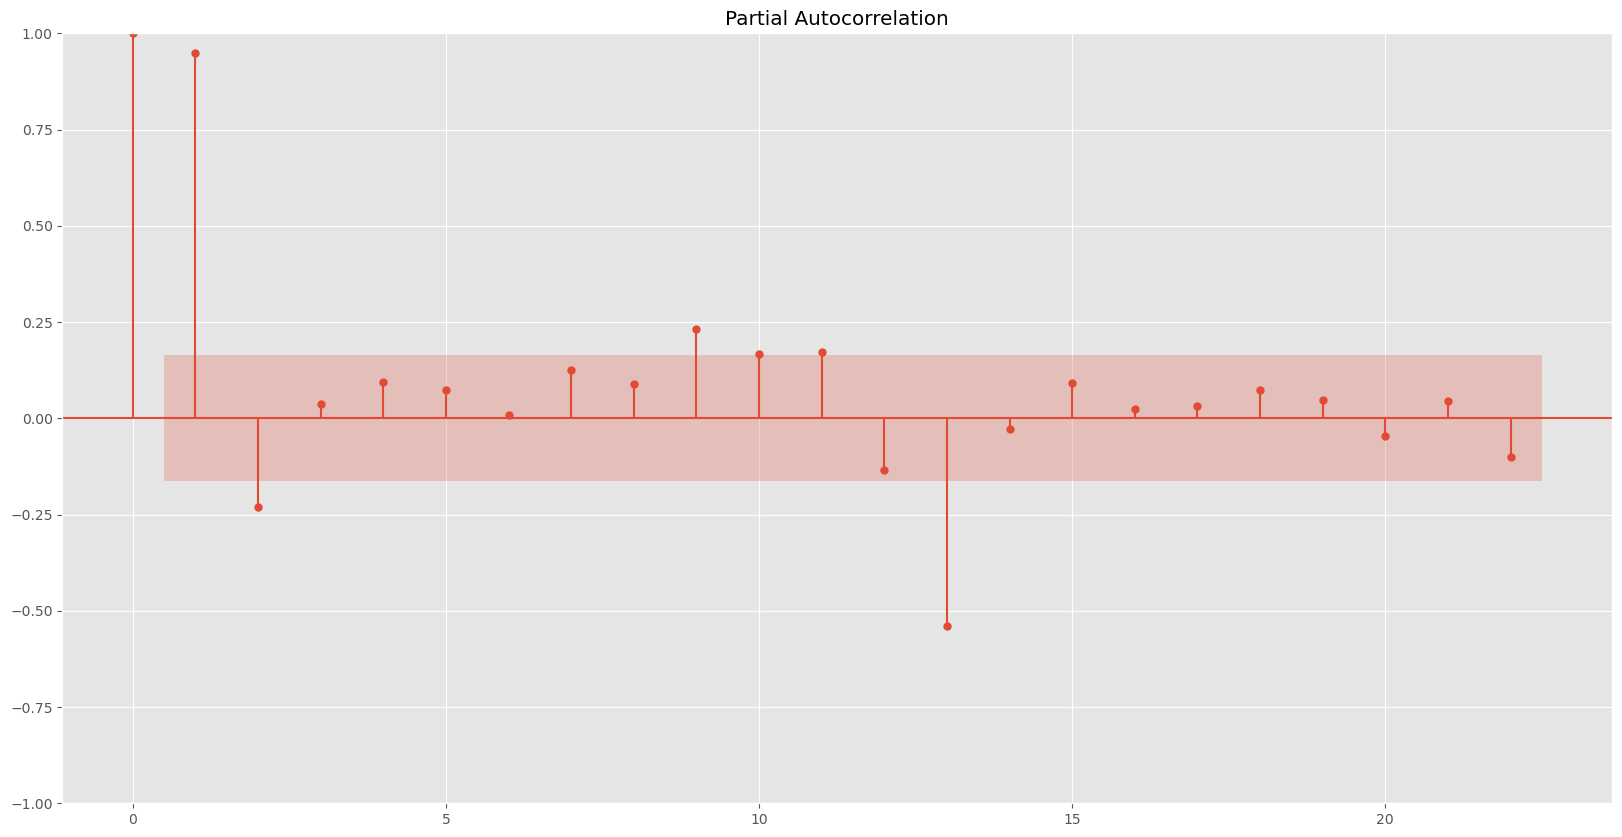

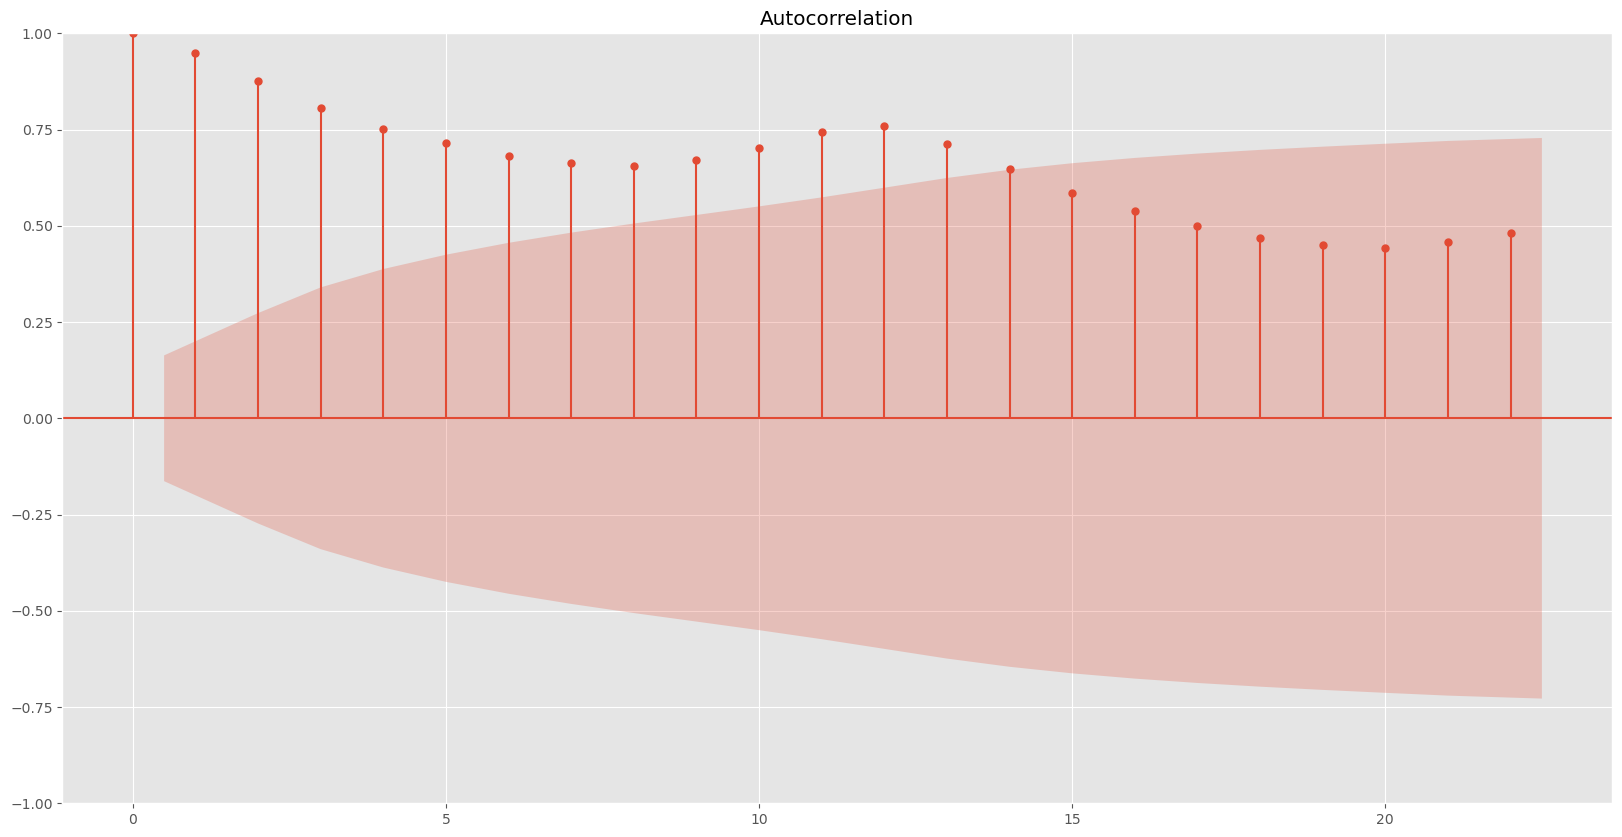

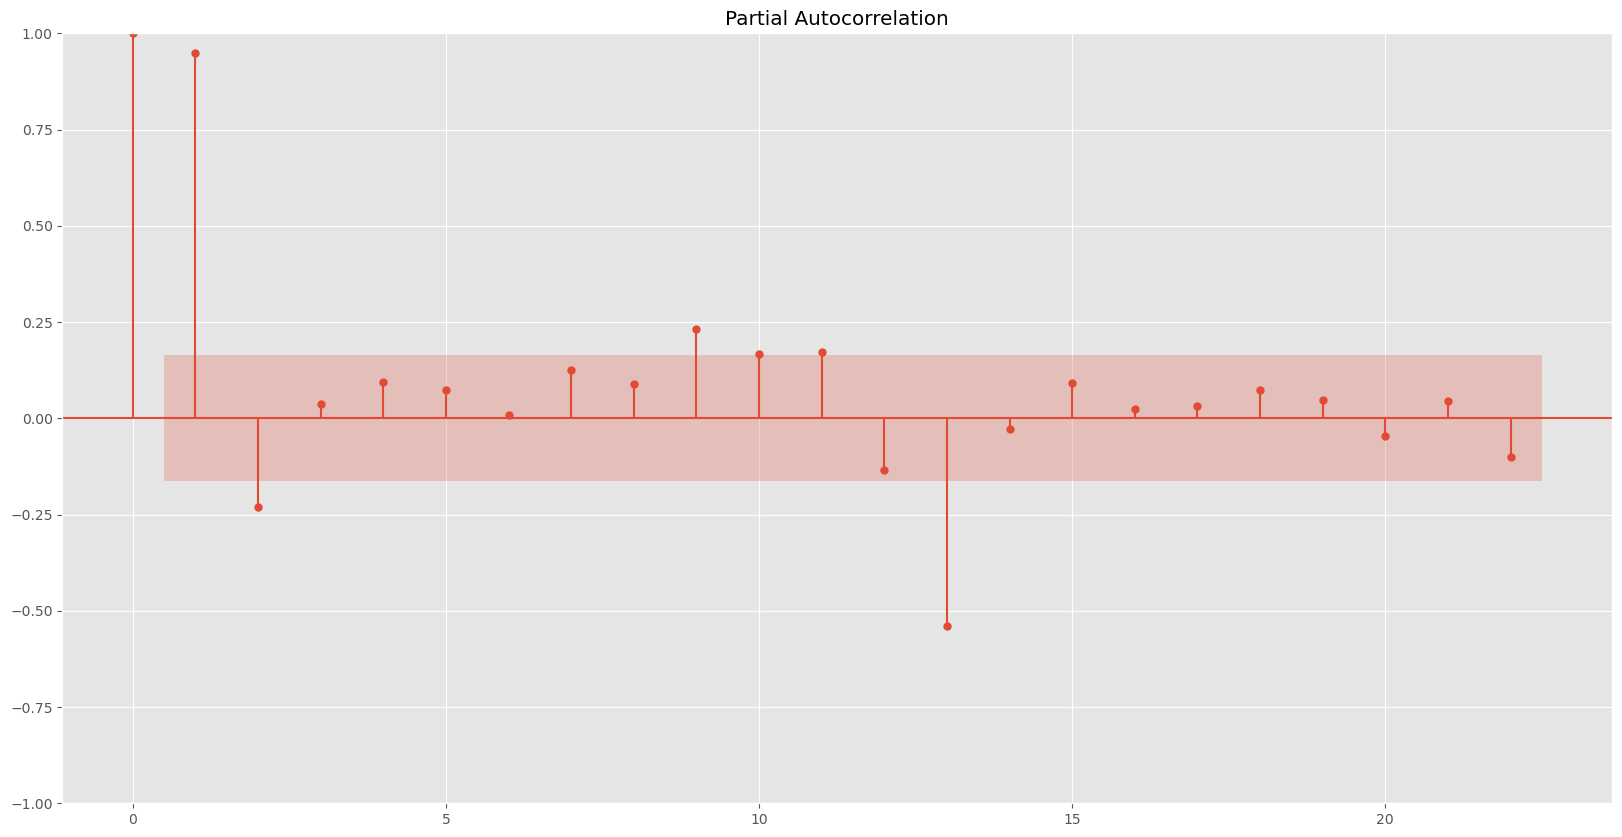

In [40]:
plot_acf(data)
plot_pacf(data)


In [41]:
q = d =range(0, 2)

p = range(0, 4)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [42]:
train_data = data['1949-01-01': '1959-12-01']
test_data = data['1960-01-01':'1960-12-01']


In [43]:
AIC = []

AIC = Akaike Information Criterion
It evaluates the models. The smaller the number is the better the model is. It gets the sum of the squares of the errors but also takes consideration of the model complexity (too high parameters).
In plain terms AIC is higher for parameters 
that gave small SSE (sum of the squares of the errors) and has high complexity 
than
reasonably SSE and small complexity.

In [44]:
SARIMAX_model = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('SARIMX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10
SARIMX(0, 0, 0)x(0, 0, 0, 12) - AIC:1853.867132204165
At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01466D+00    |proj g|=  2.25681D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      2      1     0     0   2.206D-06   7.015D+00
  F =   7.0146482280460800     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate    5    f=  3.60108D+00    |proj g|=  3.13659D-02

At iterate   10    f=  3.59474D+00    |proj g|=  2.14518D-01

At iterate   15    f=  3.50812D+00    |proj g|=  3.00449D-01

At iterate   20    f=  3.50287D+00    |proj g|=  1.22595D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   1.226D-05   3.503D+00
  F =   3.5028657683556408     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:930.7565628458892

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc


At iterate   45    f=  3.45345D+00    |proj g|=  3.41328D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     96      2     0     0   3.927D-03   3.453D+00
  F =   3.4534454507522097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:919.7095989985834

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23863D+00    |proj g|=  9.77467D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/


At iterate    5    f=  3.17135D+00    |proj g|=  3.18113D-01

At iterate   10    f=  3.16116D+00    |proj g|=  6.08249D-02

At iterate   15    f=  3.11289D+00    |proj g|=  8.21219D-02

At iterate   20    f=  3.11256D+00    |proj g|=  1.10049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   3.035D-05   3.113D+00
  F =   3.1125636834492658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:829.7168124306062

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc


At iterate    5    f=  3.07741D+00    |proj g|=  6.36793D-02

At iterate   10    f=  3.07044D+00    |proj g|=  1.65698D+00

At iterate   15    f=  3.06219D+00    |proj g|=  1.99241D-02

At iterate   20    f=  3.06002D+00    |proj g|=  1.80120D-02

At iterate   25    f=  3.06001D+00    |proj g|=  8.25372D-02

At iterate   30    f=  3.05902D+00    |proj g|=  1.03692D+00

At iterate   35    f=  3.05693D+00    |proj g|=  4.45776D-02

At iterate   40    f=  3.05643D+00    |proj g|=  1.44656D-01

At iterate   45    f=  3.05627D+00    |proj g|=  1.05950D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     69   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE 12) - AIC:816.8549725796524

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83904D+00    |proj g|=  9.31664D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   9.317D-06   2.839D+00
  F =   2.8390414127711820     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:757.506932971592

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variable

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.77951D+00    |proj g|=  1.27003D-01

At iterate   10    f=  2.77047D+00    |proj g|=  6.51291D-02

At iterate   15    f=  2.76711D+00    |proj g|=  1.66902D-02

At iterate   20    f=  2.74576D+00    |proj g|=  2.23983D-01

At iterate   25    f=  2.73132D+00    |proj g|=  3.09974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     35      1     0     0   3.767D-05   2.731D+00
  F =   2.7313227573632037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:731.0692079438858

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate    5    f=  3.72390D+00    |proj g|=  4.53609D-02

At iterate   10    f=  3.59701D+00    |proj g|=  4.92214D-02

At iterate   15    f=  3.59460D+00    |proj g|=  3.02958D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   3.030D-07   3.595D+00
  F =   3.5945957522570375     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:954.9732785958579

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13228D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate    5    f=  3.76426D+00    |proj g|=  4.50413D-02

At iterate   10    f=  3.58029D+00    |proj g|=  1.20902D-01

At iterate   15    f=  3.56606D+00    |proj g|=  6.10797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   9.356D-06   3.566D+00
  F =   3.5660553168854565     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:947.4386036577605

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70892D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.45366D+00    |proj g|=  6.91327D-01

At iterate   20    f=  3.87449D+00    |proj g|=  1.48980D+00

At iterate   25    f=  3.64818D+00    |proj g|=  2.30689D-01

At iterate   30    f=  3.31785D+00    |proj g|=  8.68353D-01

At iterate   35    f=  3.27961D+00    |proj g|=  5.07776D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     68      1     0     0   4.651D-06   3.280D+00
  F =   3.2796055015052916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:873.815852397397

           * * *

Machine precision = 2.220D-16
 N =       

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  4.50836D+00    |proj g|=  8.83369D-02

At iterate   25    f=  4.12324D+00    |proj g|=  4.08248D+00

At iterate   30    f=  3.53381D+00    |proj g|=  5.99745D-01

At iterate   35    f=  3.26851D+00    |proj g|=  9.24973D-02

At iterate   40    f=  3.25511D+00    |proj g|=  8.38516D-01

At iterate   45    f=  3.25078D+00    |proj g|=  5.47092D-02

At iterate   50    f=  3.25077D+00    |proj g|=  6.48571D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     87      1     0     0   6.486D-05   3.251D+00
  F =   3.2507731262094057     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/l

RUNNING THE L-BFGS-B CODE 12) - AIC:868.2041053192831

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33433D+00    |proj g|=  1.12059D-01

At iterate    5    f=  3.31818D+00    |proj g|=  5.38891D-02

At iterate   10    f=  3.10282D+00    |proj g|=  1.16730D-01

At iterate   15    f=  3.07037D+00    |proj g|=  1.50306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   1.114D-07   3.070D+00
  F =   3.0703690238020487     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<

 This problem is unconstrained.



At iterate    5    f=  3.31462D+00    |proj g|=  2.79101D-02

At iterate   10    f=  3.26571D+00    |proj g|=  7.25844D-02

At iterate   15    f=  3.00341D+00    |proj g|=  7.63993D-01

At iterate   20    f=  2.97117D+00    |proj g|=  1.25048D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     38      1     0     0   5.864D-05   2.971D+00
  F =   2.9711569340220669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:794.3854305818256

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  4.75588D+00    |proj g|=  1.79674D-01

At iterate   15    f=  4.53903D+00    |proj g|=  1.49974D-01

At iterate   20    f=  4.21518D+00    |proj g|=  1.59116D+00

At iterate   25    f=  3.03717D+00    |proj g|=  4.08424D+00

At iterate   30    f=  2.90495D+00    |proj g|=  9.53264D-02

At iterate   35    f=  2.90075D+00    |proj g|=  2.69307D-02

At iterate   40    f=  2.89998D+00    |proj g|=  1.33213D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     80      1     0     0   1.332D-06   2.900D+00
  F =   2.8999849582497750     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  4.73058D+00    |proj g|=  4.75146D-02

At iterate   20    f=  4.40977D+00    |proj g|=  1.56439D+00

At iterate   25    f=  3.62923D+00    |proj g|=  3.43574D-01

At iterate   30    f=  3.10897D+00    |proj g|=  1.61372D+00

At iterate   35    f=  2.91492D+00    |proj g|=  6.06801D-02

At iterate   40    f=  2.88986D+00    |proj g|=  7.37966D-01

At iterate   45    f=  2.88014D+00    |proj g|=  1.93382D-01


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  2.87753D+00    |proj g|=  1.34503D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   1.345D-02   2.878D+00
  F =   2.8775335080708815     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE 12) - AIC:771.6688461307127

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90725D+00    |proj g|=  4.26511D-02

At iterate    5    f=  2.89613D+00    |proj g|=  4.66286D-02

At iterate   10    f=  2.67088D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.89459D+00    |proj g|=  3.97119D-02

At iterate   10    f=  2.81636D+00    |proj g|=  8.95841D-02

At iterate   15    f=  2.60369D+00    |proj g|=  1.54755D-01

At iterate   20    f=  2.58468D+00    |proj g|=  5.34367D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     33      1     0     0   2.680D-05   2.584D+00
  F =   2.5843028956996918     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:694.2559644647187

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32346D+00    |proj g|=  7.99564D-02

At iterate    5    f=  3.32279D+00    |proj g|=  4.06423D-02
SARIMX(0, 1, 0)x(1, 0, 1, 12) - AIC:882.2776805554445
At iterate   10    f=  3.31993D+00    |proj g|=  1.54488D-01

At iterate   15    f=  3.31923D+00    |proj g|=  6.25220D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   6.252D-06   3.319D+00
  F =   3.3192336384675927     

CONVERGENCE: NOR

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate   15    f=  3.04437D+00    |proj g|=  4.72566D-02

At iterate   20    f=  3.04424D+00    |proj g|=  1.30092D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   5.000D-06   3.044D+00
  F =   3.0442428135706665     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:811.6801027826559

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76398D+00    |proj g|=  3.33635D-06

           * * *

Tit   = total number of

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.75549D+00    |proj g|=  8.13483D-02

At iterate   10    f=  2.75093D+00    |proj g|=  3.84471D-03

At iterate   15    f=  2.75025D+00    |proj g|=  4.48037D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     25      1     0     0   1.305D-06   2.750D+00
  F =   2.7502395471927765     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:734.063240458893

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70843D+00    |pro

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71155D+00    |proj g|=  4.45573D-02

At iterate    5    f=  2.70997D+00    |proj g|=  4.25756D-02

At iterate   10    f=  2.70966D+00    |proj g|=  1.16751D-03

At iterate   15    f=  2.70964D+00    |proj g|=  1.64589D-02

At iterate   20    f=  2.70556D+00    |proj g|=  6.87446D-02

At iterate   25    f=  2.70476D+00    |proj g|=  1.82681D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     35      1     0     0   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.41204D+00    |proj g|=  3.17053D-03

At iterate   10    f=  2.41178D+00    |proj g|=  7.94192D-03

At iterate   15    f=  2.41178D+00    |proj g|=  5.02052D-03

At iterate   20    f=  2.41178D+00    |proj g|=  2.11396D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     37      1     0     0   2.114D-04   2.412D+00
  F =   2.4117781993120468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:646.7094446183804

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   1.317D-06   3.020D+00
  F =   3.0204967086403314     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:803.4111310810475

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98072D+00    |proj g|=  1.08000D-01

At iterate    5    f=  3.94424D+00    |proj g|=  4.68212D-02

At iterate   10    f=  3.44060D+00    |proj g|=  7.75066D-01

At iterate   15    f=  3.35942D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate    0    f=  3.02843D+00    |proj g|=  7.43874D-02

At iterate    5    f=  3.01853D+00    |proj g|=  3.80242D-02

At iterate   10    f=  3.01133D+00    |proj g|=  3.41971D-03

At iterate   15    f=  3.01083D+00    |proj g|=  4.50959D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     22      1     0     0   4.510D-06   3.011D+00
  F =   3.0108258313160485     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:802.8580194674369

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.53506D+00    |proj g|=  7.35375D-02

At iterate   10    f=  3.24245D+00    |proj g|=  2.46272D-01

At iterate   15    f=  3.02360D+00    |proj g|=  4.83906D-02

At iterate   20    f=  3.01124D+00    |proj g|=  1.53106D-02

At iterate   25    f=  3.00721D+00    |proj g|=  8.27580D-03

At iterate   30    f=  3.00471D+00    |proj g|=  2.30785D-02

At iterate   35    f=  3.00275D+00    |proj g|=  1.77248D-02

At iterate   40    f=  3.00166D+00    |proj g|=  1.63607D-02

At iterate   45    f=  3.00074D+00    |proj g|=  3.16759D-02

At iterate   50    f=  3.00002D+00    |proj g|=  1.68827D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/l


At iterate    5    f=  2.74127D+00    |proj g|=  5.01577D-02

At iterate   10    f=  2.73562D+00    |proj g|=  7.82188D-03

At iterate   15    f=  2.73478D+00    |proj g|=  2.69289D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     28      1     0     0   4.344D-07   2.735D+00
  F =   2.7347729557591669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:731.9800603204201

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17630D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.69386D+00    |proj g|=  1.12806D-01

At iterate   20    f=  2.66930D+00    |proj g|=  3.99152D-03

At iterate   25    f=  2.66927D+00    |proj g|=  5.59908D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   5.599D-06   2.669D+00
  F =   2.6692698058738191     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:714.6872287506883

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18038D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.15203D+00    |proj g|=  3.14358D-02

At iterate   10    f=  3.05620D+00    |proj g|=  1.47162D-01

At iterate   15    f=  2.73319D+00    |proj g|=  2.65157D-01

At iterate   20    f=  2.67445D+00    |proj g|=  1.27455D-02

At iterate   25    f=  2.67114D+00    |proj g|=  1.00912D-02

At iterate   30    f=  2.66972D+00    |proj g|=  2.23231D-02

At iterate   35    f=  2.66941D+00    |proj g|=  8.50066D-03

At iterate   40    f=  2.66930D+00    |proj g|=  8.07113D-04

At iterate   45    f=  2.66926D+00    |proj g|=  8.09487D-04

At iterate   50    f=  2.66925D+00    |proj g|=  9.45295D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE 12) - AIC:716.6810482609134

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40298D+00    |proj g|=  4.52904D-02

At iterate    5    f=  2.39979D+00    |proj g|=  5.59425D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     12      1     0     0   8.662D-06   2.400D+00
  F =   2.3996722484026733     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:643.5134735783058

           * * *

Machine precision = 2.220D-16
 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.40064D+00    |proj g|=  7.33667D-03

At iterate   10    f=  2.39301D+00    |proj g|=  7.16630D-02

At iterate   15    f=  2.38911D+00    |proj g|=  6.94391D-03

At iterate   20    f=  2.38844D+00    |proj g|=  2.21649D-02

At iterate   25    f=  2.38430D+00    |proj g|=  8.44597D-02

At iterate   30    f=  2.38419D+00    |proj g|=  1.40201D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     41      1     0     0   1.402D-04   2.384D+00
  F =   2.3841933889368905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:641.42705467933

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)

   evaluations in the last line search.  Termination
  


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   6.344D-06   3.094D+00
  F =   3.0937873310936643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:822.7598554087274

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98526D+00    |proj g|=  4.87705D-02

At iterate    5    f=  3.97327D+00    |proj g|=  3.39871D-02

At iterate   10    f=  3.73224D+00    |proj g|=  2.22242D+00

At iterate   15    f=  3.37067D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate   15    f=  3.12063D+00    |proj g|=  5.56961D-02

At iterate   20    f=  3.11866D+00    |proj g|=  8.06278D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   2.854D-06   3.119D+00
  F =   3.1186250161593545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:831.3170042660696

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58356D+00    |proj g|=  4.55667D-02

At iterate    5    f=  3.57402D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.12560D+00    |proj g|=  7.03509D-01

At iterate   20    f=  3.00623D+00    |proj g|=  1.04337D-01

At iterate   25    f=  3.00377D+00    |proj g|=  8.45745D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     36      1     0     0   4.901D-06   3.004D+00
  F =   3.0037669869679244     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:802.994484559532

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89880D+00    |pro

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.75978D+00    |proj g|=  3.79456D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   2.430D-06   2.760D+00
  F =   2.7597784152731504     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:736.5815016321117

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85609D+00    |proj g|=  3.66047D-01

At iterate    5    f=  2.77634D+00    |proj g|=  3.42502D-02

At iterate   10    f=  2.76594D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.17353D+00    |proj g|=  5.26384D-02

At iterate   10    f=  3.13528D+00    |proj g|=  1.75421D-01

At iterate   15    f=  3.03109D+00    |proj g|=  2.49924D-01

At iterate   20    f=  2.80035D+00    |proj g|=  1.83535D-01

At iterate   25    f=  2.67533D+00    |proj g|=  2.81338D-02

At iterate   30    f=  2.67446D+00    |proj g|=  1.73653D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     46      1     0     0   7.510D-06   2.674D+00
  F =   2.6744583987767170     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:716.05701727705

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.17151D+00    |proj g|=  6.18236D-02

At iterate   10    f=  3.11188D+00    |proj g|=  2.77122D-01

At iterate   15    f=  2.92321D+00    |proj g|=  3.78376D-01

At iterate   20    f=  2.71924D+00    |proj g|=  2.16576D-01

At iterate   25    f=  2.67447D+00    |proj g|=  5.57241D-02

At iterate   30    f=  2.67352D+00    |proj g|=  1.24407D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     45      1     0     0   1.219D-05   2.674D+00
  F =   2.6735194724225462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:717.80914071955

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.40996D+00    |proj g|=  1.74425D-02

At iterate   10    f=  2.40914D+00    |proj g|=  7.78051D-03

At iterate   15    f=  2.40865D+00    |proj g|=  4.62594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   6.912D-06   2.409D+00
  F =   2.4086483993950747     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:645.8831774402997

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47399D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.40094D+00    |proj g|=  3.58569D-02

At iterate   15    f=  2.40039D+00    |proj g|=  1.50662D-03

At iterate   20    f=  2.40036D+00    |proj g|=  7.71473D-03

At iterate   25    f=  2.40034D+00    |proj g|=  1.64005D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.050D-05   2.400D+00
  F =   2.4003406132827867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:645.6899219066557

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate    5    f=  3.04912D+00    |proj g|=  5.16777D-03

At iterate   10    f=  3.04897D+00    |proj g|=  3.34420D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     16      1     0     0   3.340D-06   3.049D+00
  F =   3.0489694796066629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:812.927942616159

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97247D+00    |proj g|=  1.35216D-01

At iterate    5    f=  3.93357D+00    |pro

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate   20    f=  3.07365D+00    |proj g|=  6.67972D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   6.680D-06   3.074D+00
  F =   3.0736542216231650     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:819.4447145085155

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08101D+00    |proj g|=  2.22200D-01

At iterate    5    f=  3.07042D+00    |proj g|=  7.10314D-03

At iterate   10    f=  3.06927D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.53733D+00    |proj g|=  3.10976D-02

At iterate   10    f=  3.46882D+00    |proj g|=  2.63106D-01

At iterate   15    f=  3.40665D+00    |proj g|=  2.23314D-01

At iterate   20    f=  3.12755D+00    |proj g|=  4.94353D-01

At iterate   25    f=  3.01762D+00    |proj g|=  4.10071D-01

At iterate   30    f=  2.98127D+00    |proj g|=  1.95793D-02

At iterate   35    f=  2.98126D+00    |proj g|=  4.16330D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     52      1     0     0   4.163D-05   2.981D+00
  F =   2.9812588700193636     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.29060D+00    |proj g|=  2.48048D-01

At iterate   20    f=  3.02160D+00    |proj g|=  3.82362D-01

At iterate   25    f=  2.98659D+00    |proj g|=  7.00468D-02

At iterate   30    f=  2.97600D+00    |proj g|=  1.57967D-02

At iterate   35    f=  2.97596D+00    |proj g|=  8.42263D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     49      1     0     0   2.837D-05   2.976D+00
  F =   2.9759602801605856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:797.6535139623946

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE 12) - AIC:734.0677584834478

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80897D+00    |proj g|=  3.26382D-01

At iterate    5    f=  2.74998D+00    |proj g|=  2.10470D-02


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.74882D+00    |proj g|=  2.46642D-02

At iterate   15    f=  2.74274D+00    |proj g|=  9.82948D-02

At iterate   20    f=  2.73603D+00    |proj g|=  7.27644D-03

At iterate   25    f=  2.73299D+00    |proj g|=  9.61340D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     37      1     0     0   7.973D-06   2.733D+00
  F =   2.7329481881936601     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17014D+00    |proj g|=  9.75719D-02

At iterate    5    f=  3.14290D+00    |proj g|=  2.14558D-02

At iterate   10    f=  3.09546D+00    |proj g|=  8.29745D-02

At iterate   15    f=  2.88858D+00    |proj g|=  3.71976D-01

At iterate   20    f=  2.71696D+00    |proj g|=  2.27475D-01

At iterate   25    f=  2.65407D+00    |proj g|=  8.42555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     43      1     0     0   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.14273D+00    |proj g|=  2.14954D-02

At iterate   10    f=  3.05756D+00    |proj g|=  1.71753D-01

At iterate   15    f=  2.74850D+00    |proj g|=  8.49418D-01

At iterate   20    f=  2.65477D+00    |proj g|=  3.79428D-02

At iterate   25    f=  2.65400D+00    |proj g|=  3.16513D-03

At iterate   30    f=  2.65392D+00    |proj g|=  2.63901D-02

At iterate   35    f=  2.65387D+00    |proj g|=  4.45085D-04

At iterate   40    f=  2.65387D+00    |proj g|=  5.53301D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     51      1     0     0   5.533D-05   2.654D+00
  F =   2.65387061342

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.39882D+00    |proj g|=  4.18829D-02

At iterate   10    f=  2.39812D+00    |proj g|=  3.46123D-03

At iterate   15    f=  2.39771D+00    |proj g|=  1.51009D-02

At iterate   20    f=  2.39760D+00    |proj g|=  6.09163D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     24      1     0     0   3.237D-05   2.398D+00
  F =   2.3976007199389957     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44476D+00    |proj g|=  2.59257D-01

At iterate    5    f=  2.40283D+00    |proj g|=  2.31565D-02

At iterate   10    f=  2.39312D+00    |proj g|=  3.85297D-02

At iterate   15    f=  2.39052D+00    |proj g|=  9.37456D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     22      1     0     0   3.806D-05   2.391D+00
  F =   2.3905201370577585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate   10    f=  3.33461D+00    |proj g|=  1.99458D-01

At iterate   15    f=  3.32822D+00    |proj g|=  3.10814D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     30      1     0     0   3.108D-05   3.328D+00
  F =   3.3282202620161585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:884.6501491722659

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93672D+00    |proj g|=  6.07915D-02

At iterate    5    f=  3.86567D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako

RUNNING THE L-BFGS-B CODE 12) - AIC:810.0538746711335

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53506D+00    |proj g|=  6.44522D-02

At iterate    5    f=  3.50080D+00    |proj g|=  3.12595D-02

At iterate   10    f=  3.29332D+00    |proj g|=  5.31471D-01

At iterate   15    f=  2.99672D+00    |proj g|=  6.40862D-01

At iterate   20    f=  2.96571D+00    |proj g|=  9.11019D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   2.436D-06   2.966D+00
  F =   2.96

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  2.96829D+00    |proj g|=  3.22852D-02

At iterate   25    f=  2.96231D+00    |proj g|=  4.15586D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     41      1     0     0   5.202D-05   2.962D+00
  F =   2.9623053877746348     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:792.0486223725036

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72184D+00    |proj g|=  6.14550D-02

At iterate    5    f=  2.71717D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73104D+00    |proj g|=  8.94336D-02

At iterate    5    f=  2.71477D+00    |proj g|=  4.33620D-02

At iterate   10    f=  2.70913D+00    |proj g|=  4.77893D-03

At iterate   15    f=  2.70757D+00    |proj g|=  1.61567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     23      1     0     0   8.242D-06   2.708D+00
  F =   2.7075727369384346     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.92905D+00    |proj g|=  3.35351D-01

At iterate   15    f=  2.73443D+00    |proj g|=  1.03388D+00

At iterate   20    f=  2.66106D+00    |proj g|=  1.59117D-01

At iterate   25    f=  2.64217D+00    |proj g|=  2.83584D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   1.382D-04   2.642D+00
  F =   2.6421653344860960     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13736D+00    |proj g|=  5.46324D-02

At iterate    5    f=  3.10743D+00    |proj g|=  5.57525D-02

At iterate   10    f=  2.94852D+00    |proj g|=  1.97275D-01

At iterate   15    f=  2.64902D+00    |proj g|=  3.35681D-02

At iterate   20    f=  2.64376D+00    |proj g|=  7.50605D-03

At iterate   25    f=  2.64275D+00    |proj g|=  3.72656D-03

At iterate   30    f=  2.64256D+00    |proj g|=  2.99879D-03

At iterate   35    f=  2.64247D+00    |proj g|=  3.47255D-03

At iterate   40    f=  2.64241D+00    |proj g|=  2.30682D-03

At iterate   45    f=  2.64237D+00    |proj g|=  1.56779D-03

At iterate   50    f=  2.64235D+00    |proj g|=  2.11376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37623D+00    |proj g|=  5.18194D-02

At iterate    5    f=  2.37148D+00    |proj g|=  9.67691D-03

At iterate   10    f=  2.37089D+00    |proj g|=  2.88614D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   2.886D-06   2.371D+00
  F =   2.3708947659799535     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:635.9162182187077

           * * 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.36210D+00    |proj g|=  4.33135D-03

At iterate   15    f=  2.36208D+00    |proj g|=  5.49119D-04

At iterate   20    f=  2.36207D+00    |proj g|=  2.05640D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     26      1     0     0   2.056D-05   2.362D+00
  F =   2.3620739453828921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:635.5875215810835

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70801D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01573D+00    |proj g|=  4.82438D-02

At iterate    5    f=  3.01410D+00    |proj g|=  1.96161D-03

At iterate   10    f=  3.01402D+00    |proj g|=  1.36597D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   1.224D-06   3.014D+00
  F =   3.0140198019716737     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:803.7012277205218

           * * 

 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconst


At iterate    5    f=  3.04264D+00    |proj g|=  6.03810D-03

At iterate   10    f=  3.04251D+00    |proj g|=  4.25948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   2.003D-05   3.042D+00
  F =   3.0424890439694439     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:811.2171076079331

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02354D+00    |proj g|=  8.99438D-02

At iterate    5    f=  3.01421D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.51228D+00    |proj g|=  2.38893D-02

At iterate   10    f=  3.12733D+00    |proj g|=  2.41529D-01

At iterate   15    f=  2.97151D+00    |proj g|=  1.90051D-01

At iterate   20    f=  2.96569D+00    |proj g|=  1.52008D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     30      1     0     0   2.118D-05   2.966D+00
  F =   2.9656868654587374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:792.9413324811067

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.99361D+00    |proj g|=  5.49655D-01

At iterate   20    f=  2.96224D+00    |proj g|=  4.58344D-03

At iterate   25    f=  2.96214D+00    |proj g|=  5.27232D-03

At iterate   30    f=  2.96210D+00    |proj g|=  1.83402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     45      1     0     0   1.890D-05   2.962D+00
  F =   2.9620959264222360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:793.9933245754703

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.71393D+00    |proj g|=  4.87254D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   1.771D-06   2.714D+00
  F =   2.7139337855610615     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:726.4785193881203

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72800D+00    |proj g|=  9.49958D-02


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.71793D+00    |proj g|=  1.50084D-02

At iterate   10    f=  2.70731D+00    |proj g|=  6.36666D-03

At iterate   15    f=  2.70624D+00    |proj g|=  5.96060D-03

At iterate   20    f=  2.70612D+00    |proj g|=  4.46660D-03

At iterate   25    f=  2.70607D+00    |proj g|=  5.68368D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   7.056D-07   2.706D+00
  F =   2.7060676202394278     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:726.4018517432089

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.11768D+00    |proj g|=  2.10582D-02

At iterate   10    f=  2.87251D+00    |proj g|=  1.22286D-01

At iterate   15    f=  2.66752D+00    |proj g|=  2.21251D-01

At iterate   20    f=  2.64334D+00    |proj g|=  3.25095D-02

At iterate   25    f=  2.64207D+00    |proj g|=  1.05835D-02

At iterate   30    f=  2.64200D+00    |proj g|=  6.02673D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     36      1     0     0   6.027D-07   2.642D+00
  F =   2.6420031326353381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:709.48882701572

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.11934D+00    |proj g|=  3.03881D-02

At iterate   10    f=  3.04132D+00    |proj g|=  3.54520D-01

At iterate   15    f=  2.80225D+00    |proj g|=  4.06960D-01

At iterate   20    f=  2.65878D+00    |proj g|=  1.21816D-01

At iterate   25    f=  2.65013D+00    |proj g|=  5.73860D-02

At iterate   30    f=  2.64451D+00    |proj g|=  2.22149D-02

At iterate   35    f=  2.64280D+00    |proj g|=  9.02715D-03

At iterate   40    f=  2.64254D+00    |proj g|=  2.75299D-03

At iterate   45    f=  2.64233D+00    |proj g|=  3.10919D-03

At iterate   50    f=  2.64228D+00    |proj g|=  5.94807D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE 12) - AIC:711.5623839153562

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37777D+00    |proj g|=  6.28463D-02


 This problem is unconstrained.



At iterate    5    f=  2.37163D+00    |proj g|=  1.51263D-02

At iterate   10    f=  2.37088D+00    |proj g|=  2.47419D-03

At iterate   15    f=  2.37068D+00    |proj g|=  4.54841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   3.017D-05   2.371D+00
  F =   2.3706743512345030     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:637.8580287259088

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38952D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.37683D+00    |proj g|=  5.99381D-02

At iterate   10    f=  2.37423D+00    |proj g|=  1.77466D-02

At iterate   15    f=  2.36831D+00    |proj g|=  4.13408D-02

At iterate   20    f=  2.36198D+00    |proj g|=  2.27539D-02

At iterate   25    f=  2.36091D+00    |proj g|=  2.96657D-02

At iterate   30    f=  2.35739D+00    |proj g|=  5.46793D-02

At iterate   35    f=  2.35696D+00    |proj g|=  6.66290D-03

At iterate   40    f=  2.35693D+00    |proj g|=  1.23295D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     58      1     0     0   8.393D-05   2.357D+00
  F =   2.35692740720

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)

   evaluations in the last line search.  Termination
  


At iterate    5    f=  3.07102D+00    |proj g|=  3.26264D-03

At iterate   10    f=  3.07072D+00    |proj g|=  3.46942D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   7.955D-06   3.071D+00
  F =   3.0707238992650501     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:818.6711094059732

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93530D+00    |proj g|=  6.81197D-02

At iterate    5    f=  3.89798D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate   10    f=  3.04466D+00    |proj g|=  6.38500D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   3.488D-06   3.045D+00
  F =   3.0445397378014341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:811.7584907795786

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07663D+00    |proj g|=  1.94160D-01

At iterate    5    f=  3.06580D+00    |proj g|=  1.53186D-02

At iterate   10    f=  3.06310D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.20155D+00    |proj g|=  1.37735D+00

At iterate   20    f=  2.95446D+00    |proj g|=  1.99668D-01

At iterate   25    f=  2.94802D+00    |proj g|=  3.30541D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     37      1     0     0   9.265D-05   2.948D+00
  F =   2.9480224512923434     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:788.2779271411787

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53557D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    0    f=  2.77811D+00    |proj g|=  2.98378D-01

At iterate    5    f=  2.71822D+00    |proj g|=  1.48301D-02

At iterate   10    f=  2.71727D+00    |proj g|=  1.48822D-02

At iterate   15    f=  2.71280D+00    |proj g|=  2.03927D-02

At iterate   20    f=  2.70125D+00    |proj g|=  4.13071D-02

At iterate   25    f=  2.70077D+00    |proj g|=  5.44768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   2.919D-05   2.701D+00
  F =   2.7007694849154005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:725.00314401766

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.99735D+00    |proj g|=  1.72818D-01

At iterate   20    f=  2.66872D+00    |proj g|=  6.18458D-01

At iterate   25    f=  2.62512D+00    |proj g|=  5.41684D-02

At iterate   30    f=  2.62493D+00    |proj g|=  1.82575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     47      1     0     0   4.819D-06   2.625D+00
  F =   2.6249274361387851     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:704.9808431406393

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.09098D+00    |proj g|=  4.47225D-02

At iterate   15    f=  2.92760D+00    |proj g|=  3.80290D-01

At iterate   20    f=  2.73131D+00    |proj g|=  1.65627D-01

At iterate   25    f=  2.62575D+00    |proj g|=  1.44895D-01

At iterate   30    f=  2.62503D+00    |proj g|=  3.38397D-03

At iterate   35    f=  2.62492D+00    |proj g|=  7.05630D-04

At iterate   40    f=  2.62491D+00    |proj g|=  2.51276D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     50      1     0     0   2.648D-05   2.625D+00
  F =   2.6249145982198785     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.36994D+00    |proj g|=  5.01323D-03

At iterate   15    f=  2.36921D+00    |proj g|=  1.21035D-02

At iterate   20    f=  2.36886D+00    |proj g|=  2.38516D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     25      1     0     0   1.220D-05   2.369D+00
  F =   2.3688587986511740     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:637.3787228439099

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41531D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.37484D+00    |proj g|=  1.82820D-02

At iterate   10    f=  2.36585D+00    |proj g|=  4.65437D-02

At iterate   15    f=  2.36163D+00    |proj g|=  7.15504D-03

At iterate   20    f=  2.36163D+00    |proj g|=  1.36483D-04

At iterate   25    f=  2.36163D+00    |proj g|=  2.07052D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     33      1     0     0   4.990D-05   2.362D+00
  F =   2.3616269427739702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:637.4695128923281

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     45      1     0     0   6.169D-05   3.971D+00
  F =   3.9713890728341226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:1058.4467152282084

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36205D+00    |proj g|=  3.97916D-03

At iterate    5    f=  3.36202D+00    |proj g|=  6.49673D-03

At iterate   10    f=  3.36197D+00    |proj g|=  4.20108D-04

At iterate   15    f=  3.36197D+00    |p

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate    5    f=  3.89123D+00    |proj g|=  5.71502D-02

At iterate   10    f=  3.82312D+00    |proj g|=  2.38886D-01

At iterate   15    f=  3.36436D+00    |proj g|=  5.57712D-01

At iterate   20    f=  3.25852D+00    |proj g|=  5.79505D-02

At iterate   25    f=  3.24899D+00    |proj g|=  6.41269D-02

At iterate   30    f=  3.24238D+00    |proj g|=  2.75037D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     48      1     0     0   5.871D-05   3.242D+00
  F =   3.2423733884180219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:867.98657454235

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.06245D+00    |proj g|=  7.70192D-03

At iterate   10    f=  3.06043D+00    |proj g|=  1.67135D-02

At iterate   15    f=  3.05963D+00    |proj g|=  2.20785D-02

At iterate   20    f=  3.05770D+00    |proj g|=  2.62221D-03

At iterate   25    f=  3.05763D+00    |proj g|=  5.83541D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     34      1     0     0   7.131D-06   3.058D+00
  F =   3.0576320654371947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:819.2148652754194

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.44293D+00    |proj g|=  1.13619D-01

At iterate   15    f=  3.28498D+00    |proj g|=  2.49815D-01

At iterate   20    f=  2.99349D+00    |proj g|=  1.26527D-01

At iterate   25    f=  2.96489D+00    |proj g|=  3.80906D-02

At iterate   30    f=  2.95338D+00    |proj g|=  2.88359D-01

At iterate   35    f=  2.94833D+00    |proj g|=  4.80649D-02

At iterate   40    f=  2.94737D+00    |proj g|=  1.51570D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     51      1     0     0   1.456D-05   2.947D+00
  F =   2.9473679487652622     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.71209D+00    |proj g|=  1.80299D-02

At iterate   10    f=  2.71114D+00    |proj g|=  7.33552D-03

At iterate   15    f=  2.71093D+00    |proj g|=  7.36707D-04

At iterate   20    f=  2.71092D+00    |proj g|=  1.42509D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   4.613D-06   2.711D+00
  F =   2.7109213207250327     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77473D+00    |proj g|=  2.58745D-01

At iterate    5    f=  2.71639D+00    |proj g|=  1.77900D-02

At iterate   10    f=  2.71512D+00    |proj g|=  5.20665D-02

At iterate   15    f=  2.70833D+00    |proj g|=  1.10164D-02

At iterate   20    f=  2.70354D+00    |proj g|=  7.59438D-03

At iterate   25    f=  2.70347D+00    |proj g|=  1.57968D-03

At iterate   30    f=  2.70343D+00    |proj g|=  7.76633D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14356D+00    |proj g|=  1.73608D-01

At iterate    5    f=  3.10026D+00    |proj g|=  2.15547D-02

At iterate   10    f=  3.03164D+00    |proj g|=  4.84625D-02

At iterate   15    f=  2.83875D+00    |proj g|=  4.20619D-01

At iterate   20    f=  2.77163D+00    |proj g|=  2.48697D-01

At iterate   25    f=  2.64344D+00    |proj g|=  1.02795D-01

At iterate   30    f=  2.63484D+00    |proj g|=  8.03270D-02

At iterate   35    f=  2.62452D+00    |proj g|=  5.32184D-02

At iterate   40    f=  2.62436D+00    |proj g|=  9.81818D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.10078D+00    |proj g|=  2.15657D-02

At iterate   10    f=  3.07089D+00    |proj g|=  8.95379D-02

At iterate   15    f=  2.88238D+00    |proj g|=  1.89885D-01

At iterate   20    f=  2.69404D+00    |proj g|=  8.62541D-01

At iterate   25    f=  2.64518D+00    |proj g|=  5.99258D-02

At iterate   30    f=  2.64323D+00    |proj g|=  1.06669D-01

At iterate   35    f=  2.63110D+00    |proj g|=  5.54911D-02

At iterate   40    f=  2.62740D+00    |proj g|=  2.23548D-02

At iterate   45    f=  2.62483D+00    |proj g|=  7.89178D-03

At iterate   50    f=  2.62436D+00    |proj g|=  1.06257D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42219D+00    |proj g|=  1.70591D-01

At iterate    5    f=  2.37135D+00    |proj g|=  2.40118D-02

At iterate   10    f=  2.36896D+00    |proj g|=  2.05728D-02

At iterate   15    f=  2.36857D+00    |proj g|=  8.99461D-03

At iterate   20    f=  2.36846D+00    |proj g|=  3.53083D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     25      1     0     0   1.623D-05   2.368D+00
  F =   2.3684637670725812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH     

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.37470D+00    |proj g|=  3.32028D-02

At iterate   10    f=  2.36212D+00    |proj g|=  4.93469D-02

At iterate   15    f=  2.36056D+00    |proj g|=  2.24219D-03

At iterate   20    f=  2.36054D+00    |proj g|=  1.68474D-03

At iterate   25    f=  2.36054D+00    |proj g|=  1.97771D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     32      1     0     0   6.926D-05   2.361D+00
  F =   2.3605363122129286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:639.1815864242132

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate   10    f=  3.43284D+00    |proj g|=  4.52974D-01

At iterate   15    f=  3.30261D+00    |proj g|=  8.40062D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     26      1     0     0   2.697D-06   3.303D+00
  F =   3.3026033008696869     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:879.8872714295974

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.90011D+00    |proj g|=  7.75272D-02

At iterate    5    f=  3.84116D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate   15    f=  3.01520D+00    |proj g|=  1.44800D-02

At iterate   20    f=  3.01512D+00    |proj g|=  2.09165D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   1.516D-06   3.015D+00
  F =   3.0151216601520598     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:805.9921182801438

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50123D+00    |proj g|=  8.18579D-02

At iterate    5    f=  3.45421D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.13821D+00    |proj g|=  2.25448D-01

At iterate   15    f=  2.94882D+00    |proj g|=  1.70048D-01

At iterate   20    f=  2.94407D+00    |proj g|=  1.66852D-02

At iterate   25    f=  2.93515D+00    |proj g|=  4.84726D-02

At iterate   30    f=  2.93486D+00    |proj g|=  4.47328D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     70      2     0     0   6.409D-05   2.935D+00
  F =   2.9348630396568707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:786.8038424694139

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68956D+00    |proj g|=  6.11824D-02

At iterate    5    f=  2.68451D+00    |proj g|=  8.33770D-03

At iterate   10    f=  2.68381D+00    |proj g|=  1.25994D-04

           * * *

Tit   = total number of

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.68609D+00    |proj g|=  4.90073D-03

At iterate   10    f=  2.68176D+00    |proj g|=  1.57043D-02

At iterate   15    f=  2.67931D+00    |proj g|=  1.86515D-02

At iterate   20    f=  2.67886D+00    |proj g|=  1.09075D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   1.091D-05   2.679D+00
  F =   2.6788584081706373     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:719.2186197570483

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.78312D+00    |proj g|=  3.04255D-01

At iterate   20    f=  2.61505D+00    |proj g|=  7.05731D-02

At iterate   25    f=  2.60995D+00    |proj g|=  1.23367D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     33      1     0     0   2.301D-06   2.610D+00
  F =   2.6099503454110926     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:701.0268911885285

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10188D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.02883D+00    |proj g|=  5.42165D-02

At iterate   10    f=  2.79828D+00    |proj g|=  1.84464D-01

At iterate   15    f=  2.63073D+00    |proj g|=  3.29252D-02

At iterate   20    f=  2.61189D+00    |proj g|=  3.07269D-02

At iterate   25    f=  2.60838D+00    |proj g|=  3.24521D-02

At iterate   30    f=  2.60815D+00    |proj g|=  1.03884D-03

At iterate   35    f=  2.60815D+00    |proj g|=  8.03485D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     46      1     0     0   8.035D-05   2.608D+00
  F =   2.6081462728082414     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33244D+00    |proj g|=  4.97257D-02

At iterate    5    f=  2.32872D+00    |proj g|=  3.34707D-03

At iterate   10    f=  2.32846D+00    |proj g|=  5.47014D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     16      1     0     0   6.674D-06   2.328D+00
  F =   2.3284583113661190     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34269D+00    |proj g|=  1.04036D-01

At iterate    5    f=  2.32860D+00    |proj g|=  4.83605D-02

At iterate   10    f=  2.32410D+00    |proj g|=  3.59428D-04

At iterate   15    f=  2.32409D+00    |proj g|=  5.28382D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     24      1     0     0   1.084D-06   2.324D+00
  F =   2.3240912895211490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate   10    f=  3.33240D+00    |proj g|=  1.61792D-03

At iterate   15    f=  3.33237D+00    |proj g|=  1.92445D-02

At iterate   20    f=  3.33232D+00    |proj g|=  8.27645D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     29      1     0     0   5.511D-06   3.332D+00
  F =   3.3323214802666561     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:887.7328707903972

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51022D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.42603D+00    |proj g|=  1.18066D+00

At iterate   20    f=  3.29569D+00    |proj g|=  2.21502D-02

At iterate   25    f=  3.29563D+00    |proj g|=  2.17156D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     59      1     0     0   2.172D-05   3.296D+00
  F =   3.2956257750248126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:880.0452046065506

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89310D+00    |pr


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc


At iterate   30    f=  3.22828D+00    |proj g|=  2.45862D-02

At iterate   35    f=  3.22820D+00    |proj g|=  2.34896D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     49      1     0     0   2.349D-05   3.228D+00
  F =   3.2282000926513206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:864.2448244599486

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50896D+00    |proj g|=  5.49758D-01

At iterate    5    f=  3.02882D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.00427D+00    |proj g|=  3.79222D-02

At iterate   15    f=  3.00324D+00    |proj g|=  1.32230D-03

At iterate   20    f=  3.00321D+00    |proj g|=  6.19445D-03

At iterate   25    f=  3.00318D+00    |proj g|=  5.24717D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     35      1     0     0   2.553D-05   3.003D+00
  F =   3.0031772387121478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:804.8387910200071

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.22032D+00    |proj g|=  6.96159D-01

At iterate   20    f=  3.03299D+00    |proj g|=  2.26415D-01

At iterate   25    f=  2.92984D+00    |proj g|=  5.80329D-02

At iterate   30    f=  2.92941D+00    |proj g|=  1.00678D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     47      1     0     0   9.537D-06   2.929D+00
  F =   2.9293981780814273     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:785.3611190134968

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.43763D+00    |proj g|=  2.87755D-02

At iterate   10    f=  3.33124D+00    |proj g|=  1.20728D-01

At iterate   15    f=  3.17635D+00    |proj g|=  2.47557D-01

At iterate   20    f=  3.03347D+00    |proj g|=  1.50510D-01

At iterate   25    f=  2.93765D+00    |proj g|=  3.15411D-02

At iterate   30    f=  2.93126D+00    |proj g|=  2.51706D-02

At iterate   35    f=  2.92874D+00    |proj g|=  2.38036D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     56      1     0     0   8.335D-05   2.929D+00
  F =   2.9287355770488683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.68421D+00    |proj g|=  9.30827D-02

At iterate   10    f=  2.67705D+00    |proj g|=  1.22359D-02

At iterate   15    f=  2.67665D+00    |proj g|=  3.19488D-03

At iterate   20    f=  2.67624D+00    |proj g|=  8.35104D-03

At iterate   25    f=  2.67622D+00    |proj g|=  3.68567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     35      1     0     0   3.686D-05   2.676D+00
  F =   2.6762240246160305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:718.5231424986321

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.74867D+00    |proj g|=  5.46353D-01

At iterate   10    f=  2.68459D+00    |proj g|=  1.64495D-02

At iterate   15    f=  2.67945D+00    |proj g|=  2.85155D-02

At iterate   20    f=  2.67225D+00    |proj g|=  3.39510D-02

At iterate   25    f=  2.66968D+00    |proj g|=  1.87019D-02

At iterate   30    f=  2.66952D+00    |proj g|=  2.38903D-03

At iterate   35    f=  2.66926D+00    |proj g|=  3.57280D-03

At iterate   40    f=  2.66920D+00    |proj g|=  3.91032D-03

At iterate   45    f=  2.66919D+00    |proj g|=  6.78434D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     79   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.05478D+00    |proj g|=  2.15973D-02

At iterate   10    f=  2.99800D+00    |proj g|=  9.51489D-02

At iterate   15    f=  2.75640D+00    |proj g|=  4.34553D-01

At iterate   20    f=  2.60681D+00    |proj g|=  3.06447D-02

At iterate   25    f=  2.60386D+00    |proj g|=  1.00620D-03

At iterate   30    f=  2.60386D+00    |proj g|=  1.80997D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     57      1     0     0   1.810D-05   2.604D+00
  F =   2.6038577258602822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:701.41843962711

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.05136D+00    |proj g|=  3.20410D-02

At iterate   10    f=  2.97688D+00    |proj g|=  7.14647D-02

At iterate   15    f=  2.89138D+00    |proj g|=  1.23950D-01

At iterate   20    f=  2.71327D+00    |proj g|=  3.87185D-01

At iterate   25    f=  2.61956D+00    |proj g|=  8.99419D-02

At iterate   30    f=  2.60631D+00    |proj g|=  2.60181D-02

At iterate   35    f=  2.60377D+00    |proj g|=  6.34065D-03

At iterate   40    f=  2.60353D+00    |proj g|=  1.05252D-02

At iterate   45    f=  2.60349D+00    |proj g|=  5.20631D-04


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate   50    f=  2.60349D+00    |proj g|=  1.02934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     68      1     0     0   1.029D-04   2.603D+00
  F =   2.6034914438482173     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72523D+00    |proj g|=  4.24468D-01

At iterate    5    f=  2.32621D+00    |proj g|=  4.79540D-02

At iterate   10    f=  2.32228D+00    |proj g|=  7.21180D-02

At iterate   15    f=  2.32182D+00    |proj g|=  1.44076D-02

At iterate   20    f=  2.32176D+00    |proj g|=  9.61812D-04

At iterate   25    f=  2.32172D+00    |proj g|=  4.12532D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     44      1     0     0   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.34332D+00    |proj g|=  1.50333D-01

At iterate   10    f=  2.32732D+00    |proj g|=  9.28943D-02

At iterate   15    f=  2.32412D+00    |proj g|=  3.85985D-02

At iterate   20    f=  2.32065D+00    |proj g|=  3.46567D-02

At iterate   25    f=  2.31883D+00    |proj g|=  2.80647D-03

At iterate   30    f=  2.31883D+00    |proj g|=  3.10550D-04

At iterate   35    f=  2.31883D+00    |proj g|=  1.67777D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     46      1     0     0   3.102D-05   2.319D+00
  F =   2.3188261469591369     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc


At iterate   25    f=  4.12356D+00    |proj g|=  2.37563D-01

At iterate   30    f=  4.03120D+00    |proj g|=  2.00141D-01

At iterate   35    f=  4.02876D+00    |proj g|=  6.91496D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     60      1     0     0   1.075D-05   4.029D+00
  F =   4.0287585134284791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:1073.5922475451184

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33819D+00    |p


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/stats


At iterate   10    f=  3.82070D+00    |proj g|=  2.79923D-01

At iterate   15    f=  3.65321D+00    |proj g|=  3.95362D-01

At iterate   20    f=  3.30194D+00    |proj g|=  4.54888D-01

At iterate   25    f=  3.21914D+00    |proj g|=  1.45209D-01

At iterate   30    f=  3.21838D+00    |proj g|=  2.12957D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     48      1     0     0   5.356D-06   3.218D+00
  F =   3.2183797230795990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:861.6522468930141

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.03104D+00    |proj g|=  1.61704D-02

At iterate   20    f=  3.02885D+00    |proj g|=  5.26332D-03

At iterate   25    f=  3.02881D+00    |proj g|=  8.68945D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     28      1     0     0   8.689D-06   3.029D+00
  F =   3.0288114544818643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:811.6062239832122

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50305D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  2.95873D+00    |proj g|=  3.47824D-01

At iterate   25    f=  2.91932D+00    |proj g|=  5.83054D-03

At iterate   30    f=  2.91924D+00    |proj g|=  1.13997D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     41      1     0     0   1.532D-06   2.919D+00
  F =   2.9192446628502244     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:782.6805909924592

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50204D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78194D+00    |proj g|=  2.99679D-01

At iterate    5    f=  2.68477D+00    |proj g|=  1.50614D-01

At iterate   10    f=  2.68207D+00    |proj g|=  8.64871D-03

At iterate   15    f=  2.68183D+00    |proj g|=  1.62262D-02

At iterate   20    f=  2.68131D+00    |proj g|=  6.85387D-03

At iterate   25    f=  2.68130D+00    |proj g|=  2.05184D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.68379D+00    |proj g|=  2.42020D-02

At iterate   10    f=  2.68264D+00    |proj g|=  5.66387D-03

At iterate   15    f=  2.67985D+00    |proj g|=  1.09046D-01

At iterate   20    f=  2.67395D+00    |proj g|=  9.76417D-03

At iterate   25    f=  2.66710D+00    |proj g|=  3.33740D-02

At iterate   30    f=  2.66536D+00    |proj g|=  2.93509D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     41      1     0     0   4.036D-05   2.665D+00
  F =   2.6653648939195684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:717.65633199476

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.04357D+00    |proj g|=  1.68624D-01

At iterate   15    f=  2.98506D+00    |proj g|=  2.81842D-01

At iterate   20    f=  2.70648D+00    |proj g|=  1.77772D-01

At iterate   25    f=  2.62459D+00    |proj g|=  1.65660D-01

At iterate   30    f=  2.59427D+00    |proj g|=  5.33298D-03

At iterate   35    f=  2.59426D+00    |proj g|=  1.54016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     48      1     0     0   1.540D-04   2.594D+00
  F =   2.5942649386350345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09940D+00    |proj g|=  5.69522D-02

At iterate    5    f=  3.08067D+00    |proj g|=  7.25260D-02

At iterate   10    f=  3.04417D+00    |proj g|=  6.12267D-02

At iterate   15    f=  2.99582D+00    |proj g|=  7.17723D-02

At iterate   20    f=  2.87550D+00    |proj g|=  1.10781D-01

At iterate   25    f=  2.68890D+00    |proj g|=  3.40524D-01

At iterate   30    f=  2.60103D+00    |proj g|=  1.00481D-01

At iterate   35    f=  2.59527D+00    |proj g|=  5.48429D-02

At iterate   40    f=  2.59340D+00    |proj g|=  4.20377D-03

At iterate   45    f=  2.59339D+00    |proj g|=  1.20155D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.32560D+00    |proj g|=  2.20017D-03

At iterate   15    f=  2.32544D+00    |proj g|=  1.83151D-02

At iterate   20    f=  2.32538D+00    |proj g|=  3.90748D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     26      1     0     0   1.204D-05   2.325D+00
  F =   2.3253838178993225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37537D+00    |proj g|=  2.30545D-01

At iterate    5    f=  2.32906D+00    |proj g|=  2.22473D-02

At iterate   10    f=  2.32396D+00    |proj g|=  3.47589D-02

At iterate   15    f=  2.32213D+00    |proj g|=  7.64134D-04

At iterate   20    f=  2.32213D+00    |proj g|=  9.47870D-05

At iterate   25    f=  2.32213D+00    |proj g|=  2.43132D-04

At iterate   30    f=  2.32213D+00    |proj g|=  9.54232D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  4.00282D+00    |proj g|=  2.80322D-03

At iterate   25    f=  3.97220D+00    |proj g|=  8.39678D+00

At iterate   30    f=  3.91028D+00    |proj g|=  2.21133D+00

At iterate   35    f=  3.90750D+00    |proj g|=  7.55015D-01

At iterate   40    f=  3.90465D+00    |proj g|=  1.13762D+01

At iterate   45    f=  3.90059D+00    |proj g|=  3.13866D-01

At iterate   50    f=  3.89933D+00    |proj g|=  3.99373D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      1     0     0   3.994D+00   3.899D+00
  F =   3.8993255346241833     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/l


At iterate   10    f=  3.04081D+00    |proj g|=  4.22729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     17      1     0     0   1.880D-05   3.041D+00
  F =   3.0408117785659852     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:814.77430954142

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91704D+00    |proj g|=  2.31528D-01

At iterate    5    f=  3.85511D+00    |proj g|=  2.68668D-02

At iterate   10    f=  3.74368D+00    |proj

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.85868D+00    |proj g|=  2.80561D-02

At iterate   10    f=  3.75056D+00    |proj g|=  1.90410D-01

At iterate   15    f=  3.45613D+00    |proj g|=  9.50214D-01

At iterate   20    f=  3.27264D+00    |proj g|=  1.27848D+00

At iterate   25    f=  3.21858D+00    |proj g|=  1.12742D-01

At iterate   30    f=  3.21837D+00    |proj g|=  1.07048D-03

At iterate   35    f=  3.21836D+00    |proj g|=  1.10285D-02

At iterate   40    f=  3.21834D+00    |proj g|=  1.21660D-02

At iterate   45    f=  3.21834D+00    |proj g|=  3.61603D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     60   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  3.02874D+00    |proj g|=  2.31508D-02

At iterate   25    f=  3.02839D+00    |proj g|=  3.03393D-03

At iterate   30    f=  3.02838D+00    |proj g|=  1.00723D-03

At iterate   35    f=  3.02838D+00    |proj g|=  1.07468D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     44      1     0     0   5.518D-06   3.028D+00
  F =   3.0283795782605125     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:813.4922086607753

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are ex

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.46282D+00    |proj g|=  2.58490D-02

At iterate   10    f=  3.39346D+00    |proj g|=  1.82542D-01

At iterate   15    f=  3.32792D+00    |proj g|=  2.58193D-01

At iterate   20    f=  3.09798D+00    |proj g|=  3.29431D-01

At iterate   25    f=  2.92838D+00    |proj g|=  2.20775D-01

At iterate   30    f=  2.91944D+00    |proj g|=  9.41375D-04

At iterate   35    f=  2.91942D+00    |proj g|=  3.00479D-03
  ys=-1.109E-04  -gs= 3.779E-04 BFGS update SKIPPED

At iterate   40    f=  2.91515D+00    |proj g|=  4.98933D-02

At iterate   45    f=  2.91421D+00    |proj g|=  1.69773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  2.96311D+00    |proj g|=  4.08759D-01

At iterate   25    f=  2.93568D+00    |proj g|=  8.83132D-02

At iterate   30    f=  2.92786D+00    |proj g|=  8.00868D-02

At iterate   35    f=  2.92041D+00    |proj g|=  7.15621D-02

At iterate   40    f=  2.91733D+00    |proj g|=  6.18635D-03

At iterate   45    f=  2.91732D+00    |proj g|=  1.00771D-03


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  2.91731D+00    |proj g|=  1.29585D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   1.296D-03   2.917D+00
  F =   2.9173121762765359     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE 12) - AIC:786.1704145370055

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77984D+00    |proj g|=  2.64342D-01

At iterate    5    f=  2.68199D+00    |proj g|=  7.14884D-02

At iterate   10    f=  2.68109D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.68263D+00    |proj g|=  1.89155D-02

At iterate   10    f=  2.68222D+00    |proj g|=  6.75453D-03

At iterate   15    f=  2.68021D+00    |proj g|=  1.96659D-02

At iterate   20    f=  2.67047D+00    |proj g|=  4.52621D-02

At iterate   25    f=  2.66542D+00    |proj g|=  7.44647D-04

At iterate   30    f=  2.66539D+00    |proj g|=  6.13381D-03

At iterate   35    f=  2.66533D+00    |proj g|=  3.55818D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     47      1     0     0   4.378D-05   2.665D+00
  F =   2.6653327405670875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.95087D+00    |proj g|=  3.10471D-01

At iterate   20    f=  2.73385D+00    |proj g|=  3.00849D-01

At iterate   25    f=  2.60727D+00    |proj g|=  6.93385D-02

At iterate   30    f=  2.59956D+00    |proj g|=  2.54158D-02

At iterate   35    f=  2.59767D+00    |proj g|=  1.17198D-01

At iterate   40    f=  2.59425D+00    |proj g|=  2.31435D-02

At iterate   45    f=  2.59396D+00    |proj g|=  1.77896D-03

At iterate   50    f=  2.59395D+00    |proj g|=  1.82852D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   1.829D-04   2.594D+00
  F =   2.59395352402

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE 12) - AIC:700.8037303428781

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10623D+00    |proj g|=  1.37343D-01

At iterate    5    f=  3.06660D+00    |proj g|=  2.58247D-02

At iterate   10    f=  2.97002D+00    |proj g|=  1.75249D-01

At iterate   15    f=  2.89919D+00    |proj g|=  1.89735D-01

At iterate   20    f=  2.74965D+00    |proj g|=  2.05743D-01

At iterate   25    f=  2.61289D+00    |proj g|=  2.60434D-01

At iterate   30    f=  2.60385D+00    |proj g|=  6.89647D-02

At iterate   35    f=  2.59412D+00    |proj g|=  3.45558D-02

At iterate   40    f=  2.59353D+00    |proj g|=  1.95037D-02

At iterate   45    f=  2.59269D+00    |proj g|=  1.26662D-02

At iterate   50    f=  2.59238D+00    |proj g|=  3.39705D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE 12) - AIC:702.3884489447556

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38069D+00    |proj g|=  1.84276D-01


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.32727D+00    |proj g|=  2.05507D-02

At iterate   10    f=  2.32582D+00    |proj g|=  1.83266D-03

At iterate   15    f=  2.32553D+00    |proj g|=  1.68536D-03

At iterate   20    f=  2.32546D+00    |proj g|=  3.96524D-03

At iterate   25    f=  2.32538D+00    |proj g|=  2.05076D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     31      1     0     0   1.288D-05   2.325D+00
  F =   2.3253832516926130     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:629.9011784468498

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.32889D+00    |proj g|=  2.56605D-02

At iterate   10    f=  2.32306D+00    |proj g|=  1.48157D-02

At iterate   15    f=  2.32256D+00    |proj g|=  1.27616D-03

At iterate   20    f=  2.32222D+00    |proj g|=  8.57426D-03

At iterate   25    f=  2.32212D+00    |proj g|=  2.75602D-03

At iterate   30    f=  2.32212D+00    |proj g|=  2.65636D-04

At iterate   35    f=  2.32212D+00    |proj g|=  3.28554D-04

At iterate   40    f=  2.32212D+00    |proj g|=  6.95254D-05

At iterate   45    f=  2.32212D+00    |proj g|=  1.14907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     55   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate    5    f=  3.03946D+00    |proj g|=  5.30985D-03

At iterate   10    f=  3.03925D+00    |proj g|=  5.62274D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   2.074D-06   3.039D+00
  F =   3.0392488331763210     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:812.3616919585487

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84860D+00    |proj g|=  7.66039D-02

At iterate    5    f=  3.79276D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako


At iterate   25    f=  3.21212D+00    |proj g|=  1.25268D-02

At iterate   30    f=  3.21205D+00    |proj g|=  2.76512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     44      1     0     0   1.786D-05   3.212D+00
  F =   3.2120464273177936     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:859.9802568118974

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98370D+00    |proj g|=  3.21715D-02

At iterate    5    f=  2.98261D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.98332D+00    |proj g|=  7.24956D-03

At iterate   20    f=  2.98327D+00    |proj g|=  1.19146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     27      1     0     0   1.009D-05   2.983D+00
  F =   2.9832723434050519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:799.5838986589337

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45184D+00    |proj g|=  7.34650D-02

At iterate    5    f=  3.40955D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.41006D+00    |proj g|=  1.04899D-01

At iterate   10    f=  3.34708D+00    |proj g|=  1.34614D-01

At iterate   15    f=  3.05153D+00    |proj g|=  1.97948D-01

At iterate   20    f=  2.91990D+00    |proj g|=  7.22821D-02

At iterate   25    f=  2.91354D+00    |proj g|=  1.74714D-02

At iterate   30    f=  2.91107D+00    |proj g|=  6.20497D-03

At iterate   35    f=  2.91105D+00    |proj g|=  1.64204D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     48      1     0     0   4.437D-05   2.911D+00
  F =   2.9110479367483908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE 12) - AIC:712.7275029172766

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66539D+00    |proj g|=  9.19130D-02

At iterate    5    f=  2.65722D+00    |proj g|=  7.62905D-03

At iterate   10    f=  2.65128D+00    |proj g|=  1.14114D-02

At iterate   15    f=  2.65065D+00    |proj g|=  5.84760D-03

At iterate   20    f=  2.65041D+00    |proj g|=  2.34682D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     27      1     0     0   1.449D-05   2.650D+00
  F =   2.65

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.66419D+00    |proj g|=  8.25412D-01

At iterate   20    f=  2.58489D+00    |proj g|=  1.39702D-02

At iterate   25    f=  2.58440D+00    |proj g|=  2.36051D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     34      1     0     0   5.317D-06   2.584D+00
  F =   2.5844016268647803     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:696.282029492302

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05710D+00    |pro

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.01901D+00    |proj g|=  8.85492D-02

At iterate   10    f=  2.99367D+00    |proj g|=  7.72090D-02

At iterate   15    f=  2.85403D+00    |proj g|=  2.94717D-01

At iterate   20    f=  2.62396D+00    |proj g|=  2.70273D-01

At iterate   25    f=  2.59276D+00    |proj g|=  2.30105D-02

At iterate   30    f=  2.58204D+00    |proj g|=  3.25031D-02

At iterate   35    f=  2.58114D+00    |proj g|=  2.50961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     50      1     0     0   5.846D-06   2.581D+00
  F =   2.5811364143070605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.29259D+00    |proj g|=  1.32785D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     13     16      1     0     0   3.985D-06   2.293D+00
  F =   2.2925907489548245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30701D+00    |proj g|=  9.79983D-02

At iterate    5    f=  2.29436D+00    |proj g|=  1.77785D-02

At iterate   10    f=  2.29347D+00    |proj g|=  1.50415D-02

At iterate   15    f=  2.28904D+00    |proj g|=  1.20898D-01

At iterate   20    f=  2.28638D+00    |proj g|=  1.39605D-02

At iterate   25    f=  2.28589D+00    |proj g|=  2.37347D-02

At iterate   30    f=  2.28538D+00    |proj g|=  3.13158D-02

At iterate   35    f=  2.28254D+00    |proj g|=  2.24138D-02

At iterate   40    f=  2.28116D+00    |proj g|=  5.21834D-03

At iterate   45    f=  2.28108D+00    |proj g|=  8.77649D-04

At iterate   50    f=  2.28108D+00    |proj g|=  1.90064D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE 12) - AIC:618.205512241587

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.65116D+00    |proj g|=  4.06365D-02

At iterate    5    f=  4.60570D+00    |proj g|=  2.11189D-01

At iterate   10    f=  4.59445D+00    |proj g|=  1.38489D-02

At iterate   15    f=  4.59314D+00    |proj g|=  1.96093D-02

At iterate   20    f=  4.59062D+00    |proj g|=  1.79272D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   1.883D-05   4.591D+00
  F =   4.590

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lako

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30707D+00    |proj g|=  1.51514D-02

At iterate    5    f=  3.30333D+00    |proj g|=  3.25201D-02

At iterate   10    f=  3.30200D+00    |proj g|=  3.89616D-04

At iterate   15    f=  3.30199D+00    |proj g|=  5.63586D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   9.647D-06   3.302D+00
  F =   3.3019926723574393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  2.99099D+00    |proj g|=  4.29687D-03

At iterate   25    f=  2.99099D+00    |proj g|=  1.08491D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     40      1     0     0   1.085D-06   2.991D+00
  F =   2.9909914391247940     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE 12) - AIC:801.6217399289457

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85134D+00    |proj g|=  9.70482D-02

At iterate    5    f=  3.80744D+00    |pr

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  3.53307D+00    |proj g|=  6.79702D-01

At iterate   15    f=  3.26524D+00    |proj g|=  2.96072D-01

At iterate   20    f=  3.21158D+00    |proj g|=  5.68451D-02

At iterate   25    f=  3.21063D+00    |proj g|=  2.93726D-04

At iterate   30    f=  3.21063D+00    |proj g|=  2.45953D-03
  ys=-6.161E-03  -gs= 1.266E-04 BFGS update SKIPPED

At iterate   35    f=  3.20222D+00    |proj g|=  1.02724D-01

At iterate   40    f=  3.20113D+00    |proj g|=  8.12567D-03

At iterate   45    f=  3.20111D+00    |proj g|=  5.84010D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     68      1     1

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.96518D+00    |proj g|=  7.61104D-03

At iterate   15    f=  2.96496D+00    |proj g|=  1.57543D-02

At iterate   20    f=  2.96425D+00    |proj g|=  3.03707D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     36      1     0     0   1.344D-05   2.964D+00
  F =   2.9642454443246780     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:794.560797301715

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99069D+00    |pro

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.97973D+00    |proj g|=  3.41867D-02

At iterate   15    f=  2.96752D+00    |proj g|=  5.73847D-02

At iterate   20    f=  2.96595D+00    |proj g|=  4.73912D-03

At iterate   25    f=  2.96563D+00    |proj g|=  1.20238D-02

At iterate   30    f=  2.96505D+00    |proj g|=  1.78475D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     49      1     0     0   6.646D-05   2.965D+00
  F =   2.9650517338283819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:796.7736577306928

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE 12) - AIC:782.7066308527346

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46008D+00    |proj g|=  8.50090D-02

At iterate    5    f=  3.41949D+00    |proj g|=  2.40302D-02

At iterate   10    f=  3.27536D+00    |proj g|=  4.99069D-01


 This problem is unconstrained.



At iterate   15    f=  2.97240D+00    |proj g|=  2.14641D-01

At iterate   20    f=  2.91372D+00    |proj g|=  1.90963D-02

At iterate   25    f=  2.91193D+00    |proj g|=  9.80935D-03

At iterate   30    f=  2.90953D+00    |proj g|=  2.42735D-02

At iterate   35    f=  2.90946D+00    |proj g|=  5.19005D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     52      1     0     0   5.051D-05   2.909D+00
  F =   2.9094625871963755     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:784.0981230198431

           * * *

Machine precision = 2.220D-16
 N =      

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     23      1     0     0   9.961D-06   2.649D+00
  F =   2.6493762247857018     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66369D+00    |proj g|=  8.91264D-02

At iterate    5    f=  2.65546D+00    |proj g|=  1.04450D-02

At iterate   10    f=  2.64596D+00    |proj g|=  2.54041D-02

At iterate   15    f=  2.64479D+00    |proj g|=  7.70319D-03

At iterate   20    f=  2.63674D+00    |proj g|=  3.35617D-02

At iterate   25    f=  2.63528D+00    |proj g|=  5.93568D-03

At iterate   30    f=  2.63451D+00    |proj g|=  1.02404D-02

At iterate   35    f=  2.63446D+00    |proj g|=  3.70139D-04

At iterate   40    f=  2.63445D+00    |proj g|=  3.48517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.85289D+00    |proj g|=  3.26006D-01

At iterate   15    f=  2.63711D+00    |proj g|=  2.80216D-01

At iterate   20    f=  2.58477D+00    |proj g|=  1.36058D-02

At iterate   25    f=  2.58450D+00    |proj g|=  3.09231D-03

At iterate   30    f=  2.57518D+00    |proj g|=  1.05547D-01

At iterate   35    f=  2.57231D+00    |proj g|=  5.99384D-03

At iterate   40    f=  2.57224D+00    |proj g|=  1.87739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     60      1     0     0   5.579D-05   2.572D+00
  F =   2.5722367070608514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.02365D+00    |proj g|=  2.12352D-02

At iterate   10    f=  2.81275D+00    |proj g|=  9.10948D-02

At iterate   15    f=  2.60969D+00    |proj g|=  1.46175D-01

At iterate   20    f=  2.59230D+00    |proj g|=  3.38627D-02

At iterate   25    f=  2.58887D+00    |proj g|=  6.70530D-03

At iterate   30    f=  2.58706D+00    |proj g|=  2.29768D-02

At iterate   35    f=  2.58096D+00    |proj g|=  3.51319D-02

At iterate   40    f=  2.57991D+00    |proj g|=  1.65886D-02

At iterate   45    f=  2.57985D+00    |proj g|=  3.81044D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     66   

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.29148D+00    |proj g|=  1.92330D-02

At iterate   15    f=  2.28995D+00    |proj g|=  2.18367D-02

At iterate   20    f=  2.28643D+00    |proj g|=  1.50314D-02

At iterate   25    f=  2.28413D+00    |proj g|=  1.35429D-02

At iterate   30    f=  2.28382D+00    |proj g|=  6.69367D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     51      1     0     0   4.418D-05   2.284D+00
  F =   2.2838185140462803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE 12) - AIC:618.928087708218

           * * *

Machine precision = 2.220D-16
 N =       

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.29345D+00    |proj g|=  1.04619D-02

At iterate   10    f=  2.29234D+00    |proj g|=  2.15504D-02

At iterate   15    f=  2.28591D+00    |proj g|=  4.48013D-02

At iterate   20    f=  2.28516D+00    |proj g|=  1.17447D-02

At iterate   25    f=  2.27982D+00    |proj g|=  6.29180D-03

At iterate   30    f=  2.27974D+00    |proj g|=  3.08150D-03

At iterate   35    f=  2.27948D+00    |proj g|=  2.74484D-03

At iterate   40    f=  2.27947D+00    |proj g|=  5.01195D-04

At iterate   45    f=  2.27946D+00    |proj g|=  4.75338D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     69   

In [48]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 618.205512241587 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [53]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()




/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30701D+00    |proj g|=  9.79983D-02

At iterate    5    f=  2.29436D+00    |proj g|=  1.77785D-02

At iterate   10    f=  2.29347D+00    |proj g|=  1.50415D-02

At iterate   15    f=  2.28904D+00    |proj g|=  1.20898D-01

At iterate   20    f=  2.28638D+00    |proj g|=  1.39605D-02

At iterate   25    f=  2.28589D+00    |proj g|=  2.37347D-02

At iterate   30    f=  2.28538D+00    |proj g|=  3.13158D-02

At iterate   35    f=  2.28254D+00    |proj g|=  2.24138D-02

At iterate   40    f=  2.28116D+00    |proj g|=  5.21834D-03

At iterate   45    f=  2.28108D+00    |proj g|=  8.77649D-04

At iterate   50    f=  2.28108D+00    |proj g|=  1.90064D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
results

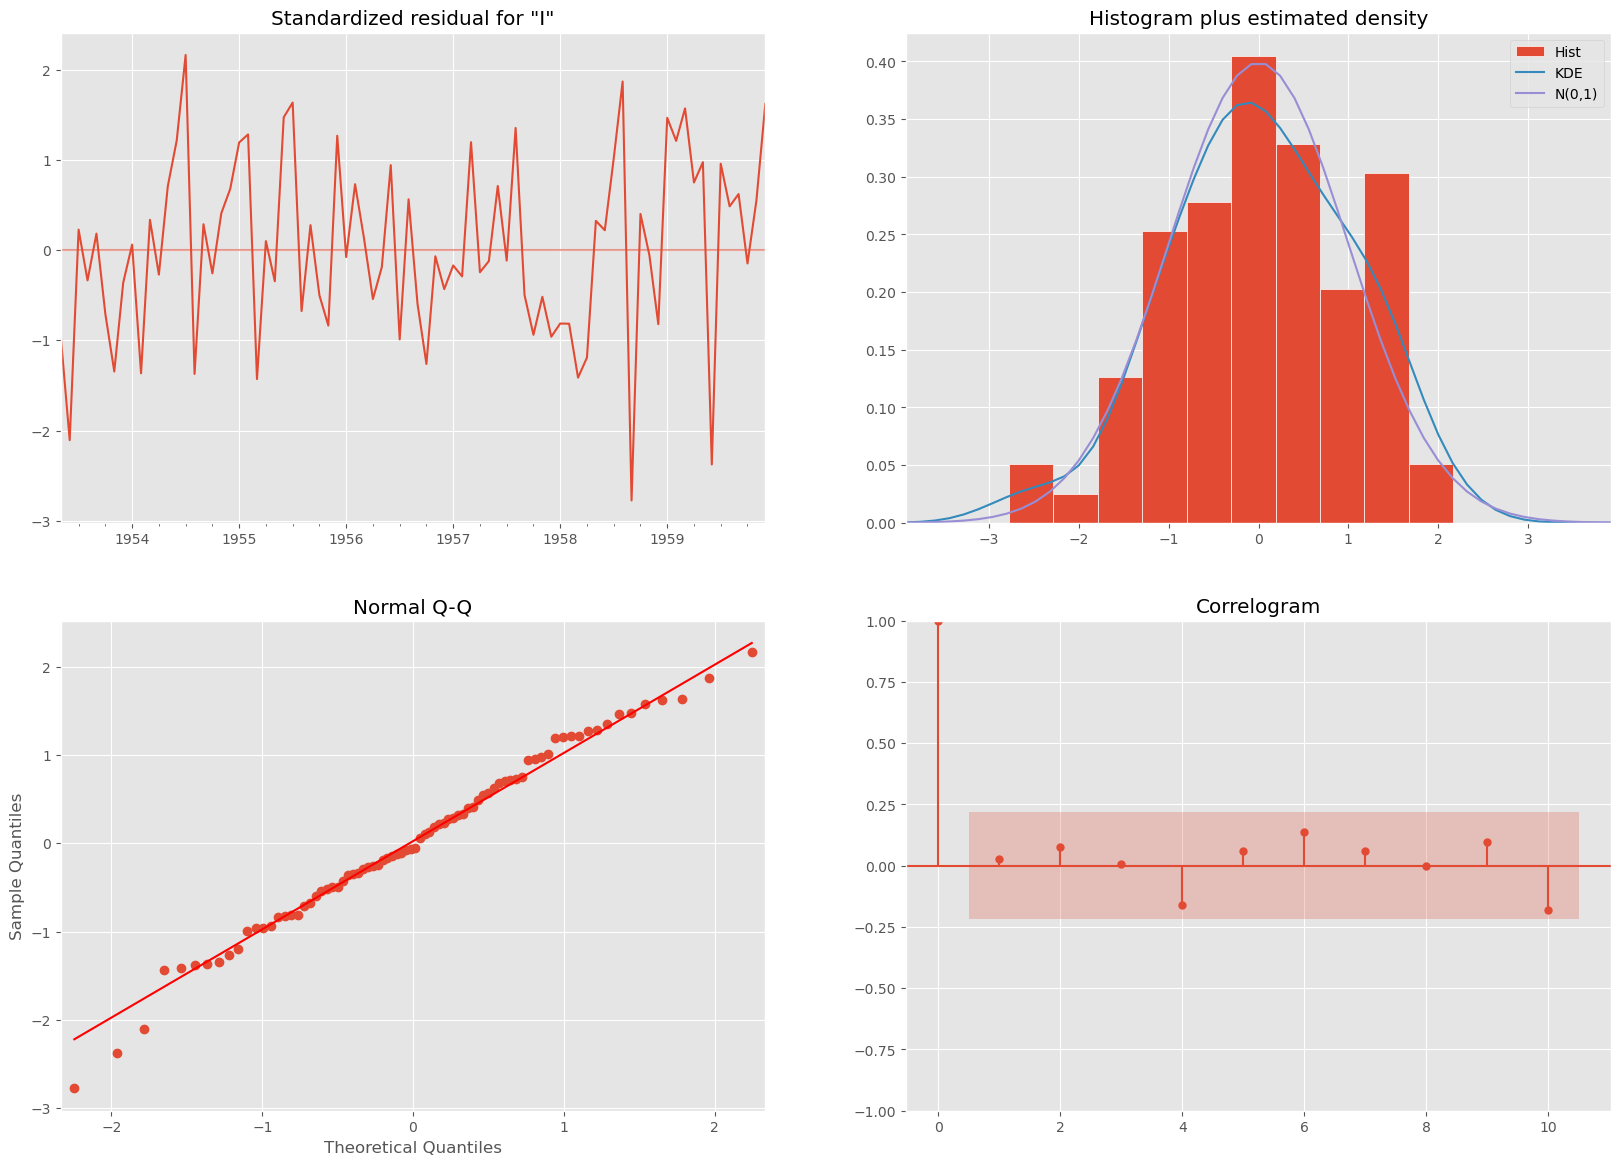

In [54]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

# todo

In [69]:
pred0 = results.get_prediction(start='1958-01-01', dynamic=True)
pred0_ci = pred0.conf_int()

print(pred0.predicted_mean)
print(pred0_ci)

1958-01-01    348.198029
1958-02-01    331.523580
1958-03-01    387.627332
1958-04-01    381.104049
1958-05-01    389.872057
1958-06-01    461.651904
1958-07-01    507.775623
1958-08-01    506.563917
1958-09-01    438.909395
1958-10-01    378.580664
1958-11-01    334.513895
1958-12-01    368.472664
1959-01-01    381.040550
1959-02-01    361.244799
1959-03-01    422.319713
1959-04-01    415.638827
1959-05-01    426.226273
1959-06-01    504.554109
1959-07-01    553.893376
1959-08-01    553.434744
1959-09-01    478.708715
1959-10-01    413.694499
1959-11-01    366.206119
1959-12-01    400.993468
Freq: MS, Name: predicted_mean, dtype: float64
            lower International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  \
1958-01-01                                         328.434625                                      
1958-02-01                                         307.994971                                      
1958-03-01                                         35

In [71]:
pred1 = results.get_prediction(start='1958-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

In [73]:
pred2 = results.get_forecast('1962-12-01')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['1960-01-01':'1960-12-01'])

1960-01-01    419.493845
1960-02-01    397.831797
1960-03-01    460.857126
1960-04-01    449.449154
1960-05-01    474.553606
1960-06-01    537.847798
1960-07-01    614.883818
1960-08-01    628.208635
1960-09-01    519.334165
1960-10-01    462.252469
1960-11-01    412.161452
1960-12-01    452.661573
Freq: MS, Name: predicted_mean, dtype: float64
